In [1]:
from display import *
from solvers import *
from problems import *
import paper

import decimal

GRID_SIZE = 10

%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Paper, Steps

In [2]:
paper = paper.PaperWithNumbers(20)

## Generator

## Add solver example with visualization

piros színnel jelölve az attention, zöld színnel az adott lépésben változó mezők

In [3]:
def add_problem_generator(a=27, b=67):
    while True:
        yield {'a': a, 'b': b, 'c': a+b}

In [4]:
def solve_addition(a=27, b=67):
    res = next(iter(AddSolver(15).generator(add_problem_generator(a,b))))
    plot_steps(res)

/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


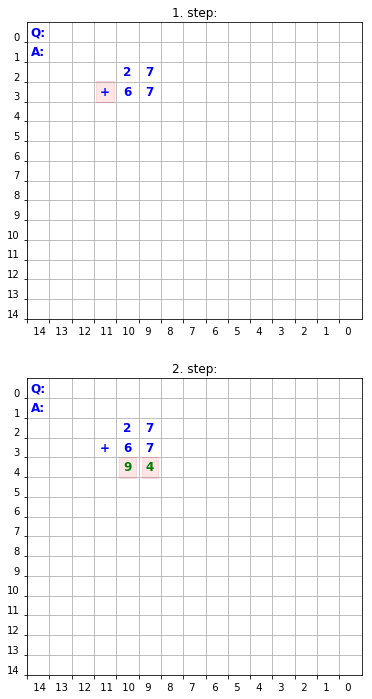

In [5]:
solve_addition()

## Is Prime (hard)

<=23 számokra "emlékezetből": nincsenek mellékszámítások.

ennél nagyobb számokra: ellenőrizzük sqrt(n)-ig az osztókat

In [6]:
def prime_generator(prime):
    while True:
        yield {'a': prime}

In [7]:
def solve_prime(n):
    res = next(iter(IsPrimeSolverHard(15).generator(prime_generator(n))))
    plot_steps(res)

/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


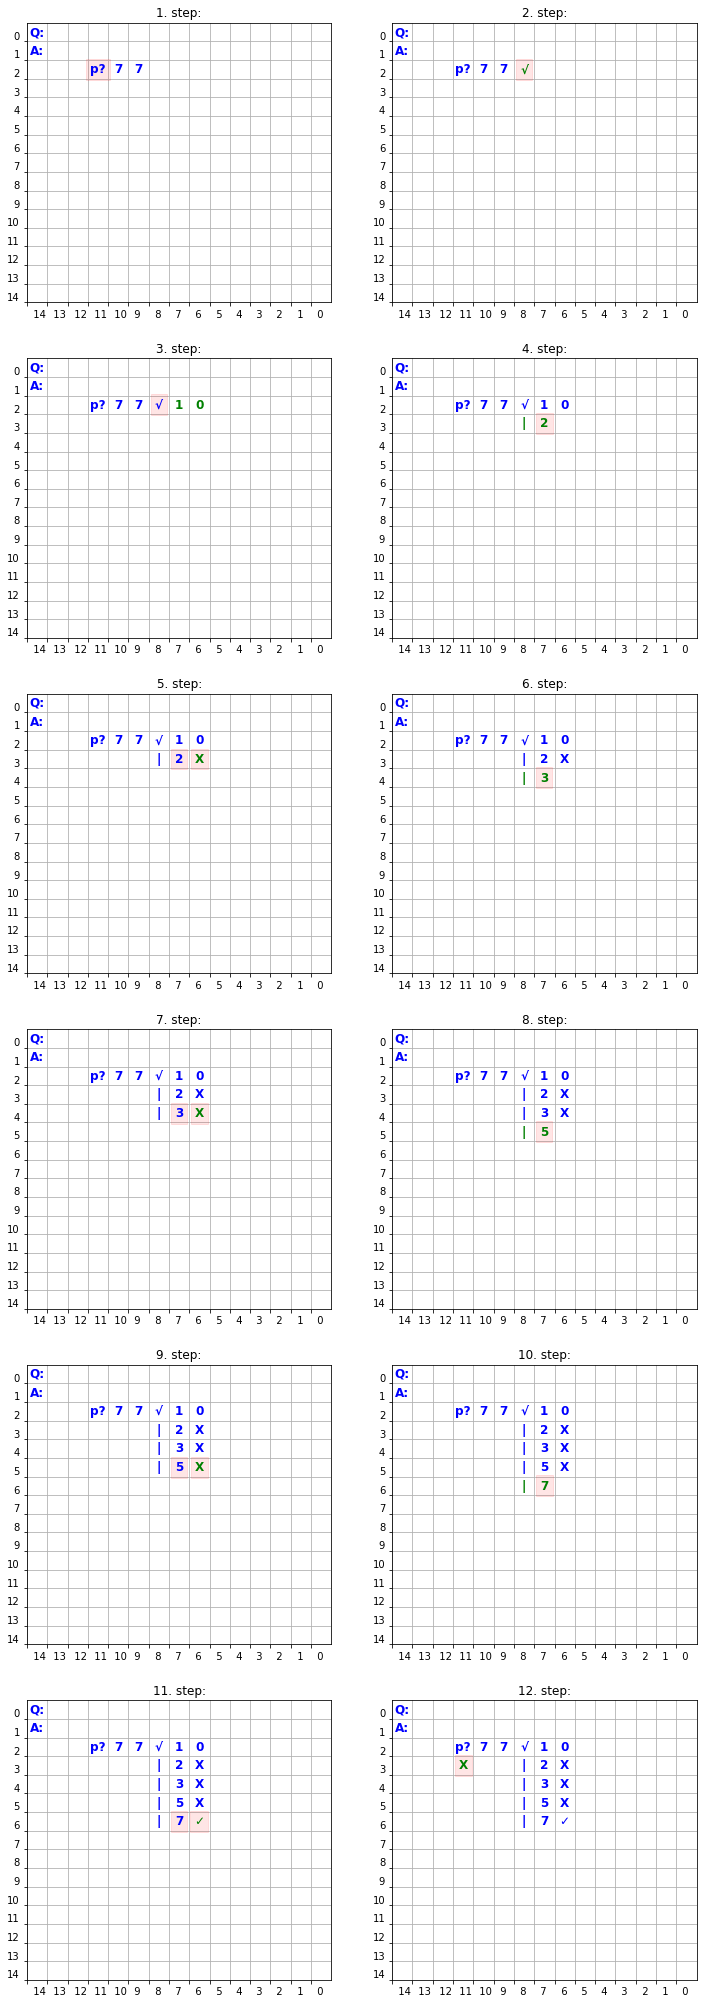

In [8]:
solve_prime(77)

/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


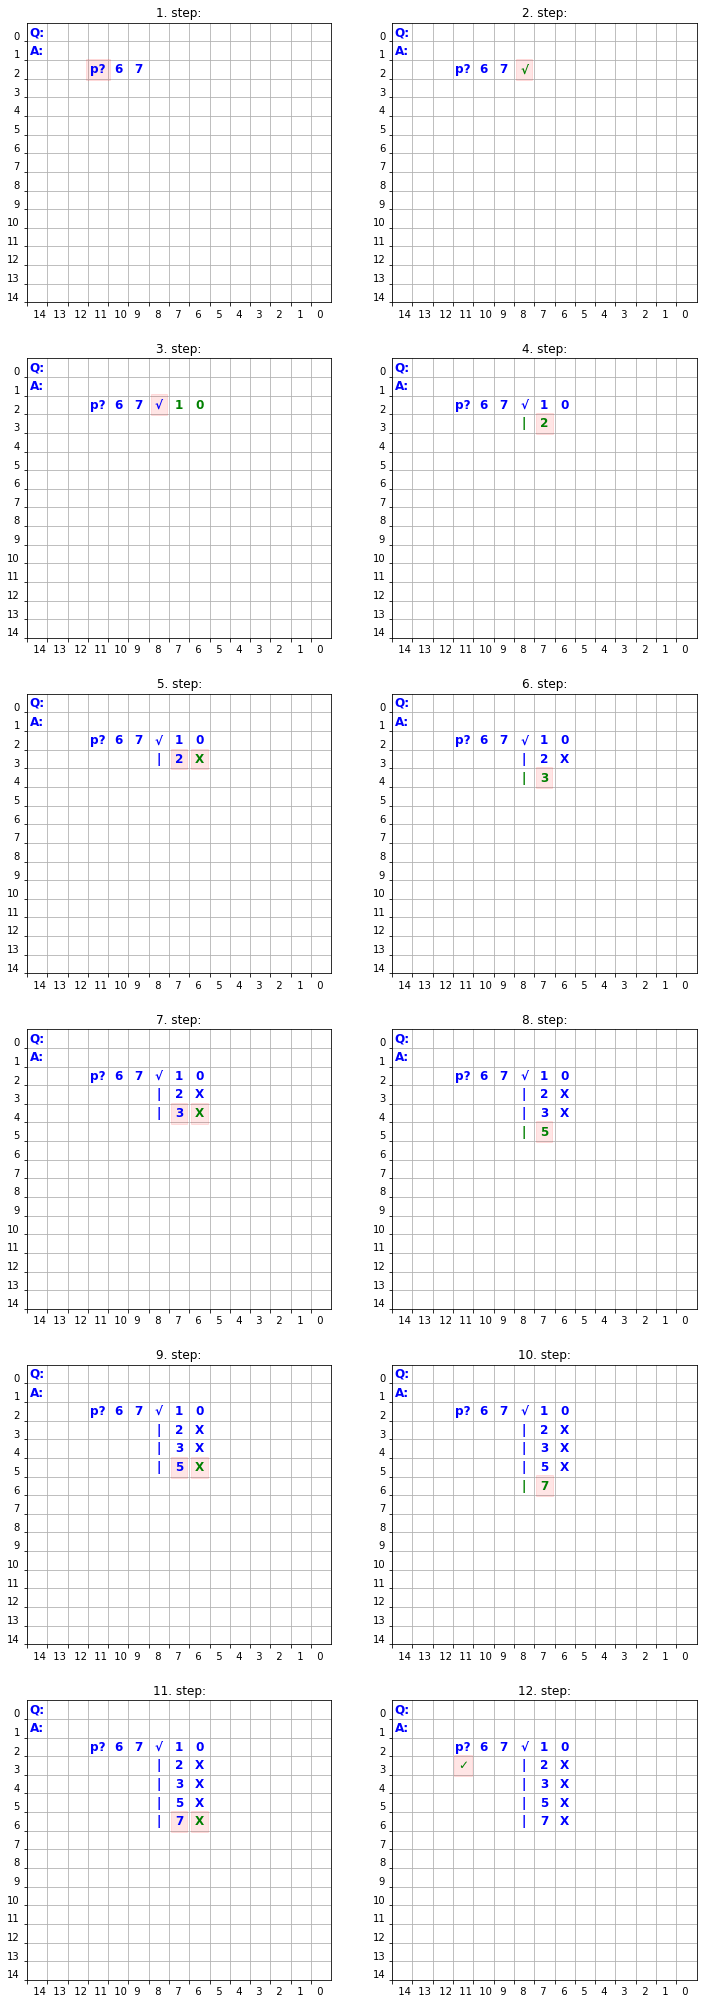

In [9]:
solve_prime(67)

# Base conversion solver

In [10]:
def bc_problem_generator(n, b1=2):
    while True:
        yield {'n': n, 'b1': b1, 'b2': 10}

In [11]:
def solve_base_conversion(n, b1):
    res = next(iter(BaseConversionSolver(15).generator(
        bc_problem_generator(n, b1))))
    plot_steps(res)


/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


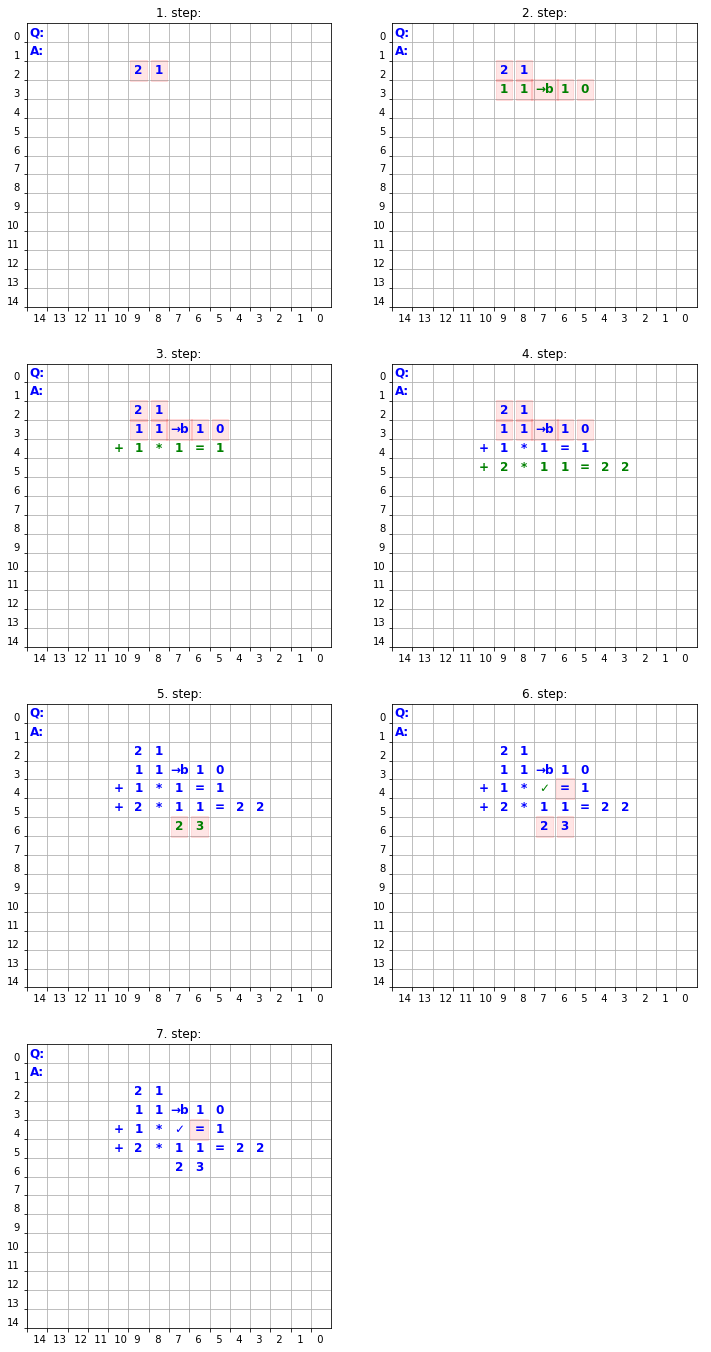

In [12]:
solve_base_conversion(23, 11)

# SubtractSolver

In [13]:
def sub_solver_gen(a=67, b=27):
    res = next(iter(SubtractSolver(15).generator(add_problem_generator(a,b))))
    plot_steps(res)

/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


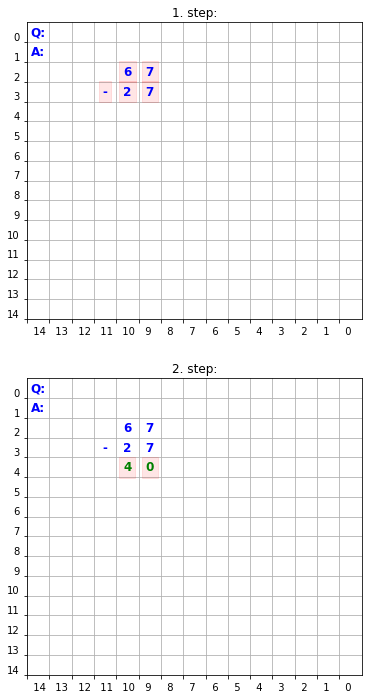

In [14]:
sub_solver_gen()

# IsDivisibleBy example

In [15]:
def divisible_solver_gen(a=10, b=5):
    res = next(iter(IsDivisibleBySolver(15).generator(add_problem_generator(a,b))))
    plot_steps(res)

/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


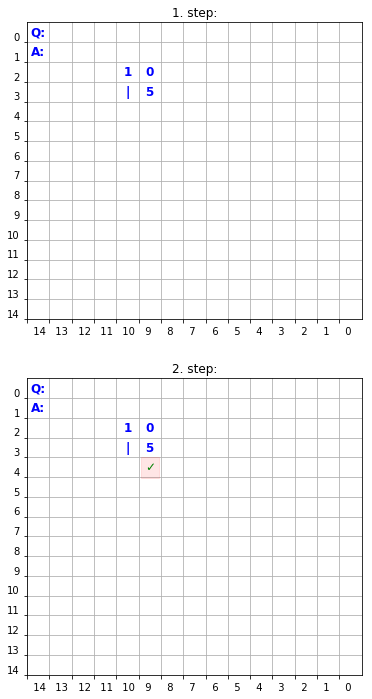

In [16]:
divisible_solver_gen()

# Factorize solver

In [17]:
def solve_factorize(n):
    res = next(iter(FactorizeSolver(15).generator(prime_generator(n))))
    plot_steps(res)

/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


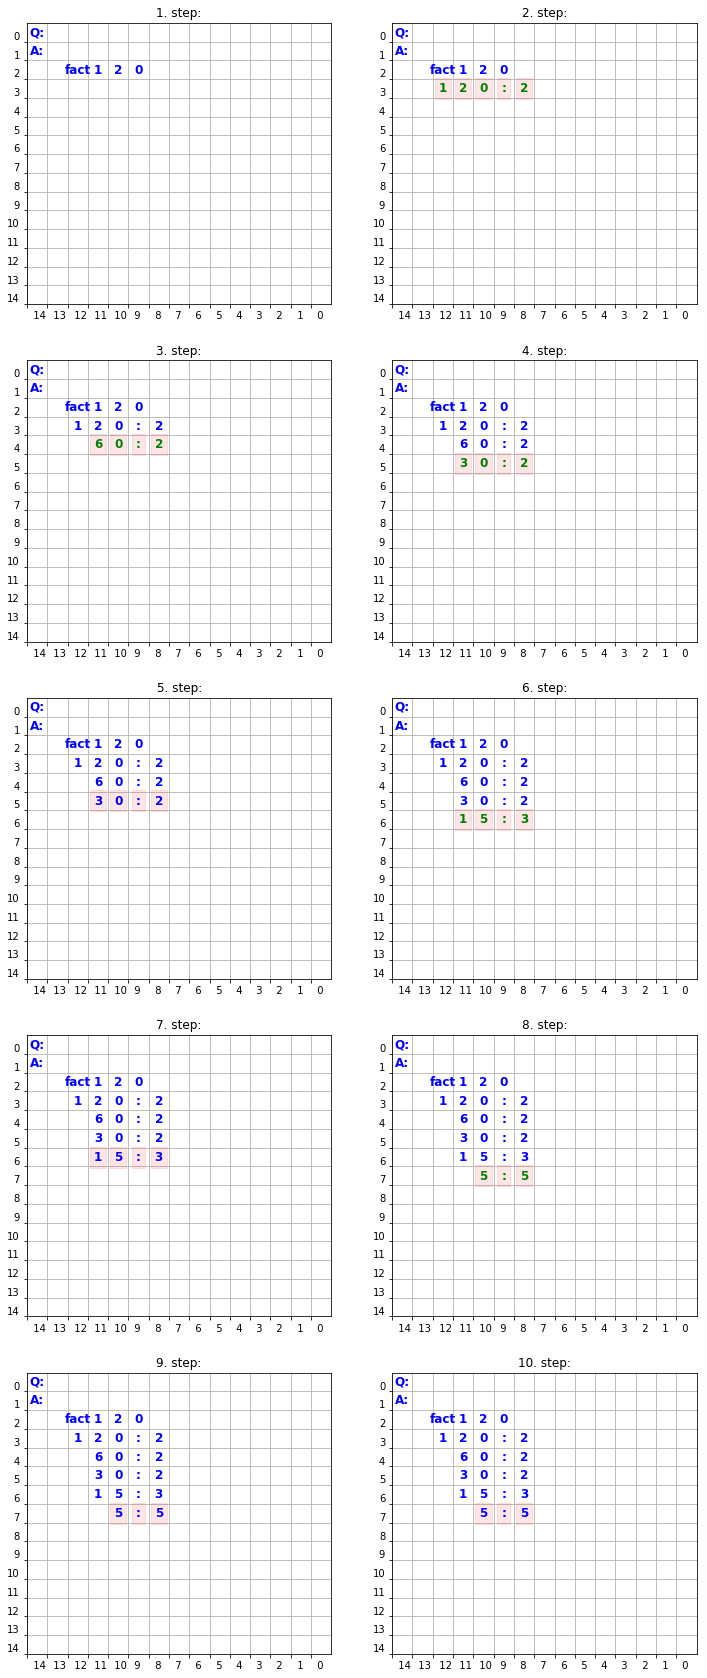

In [18]:
solve_factorize(120)

# Sort Solver

In [19]:
def list_generator():
    while True:
        yield {'ns': [ 69, 171,  96, 165, 147]}

In [20]:
def solve_sort():
    res = next(iter(SortSolver(15).generator(list_generator())))
    plot_steps(res)

/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


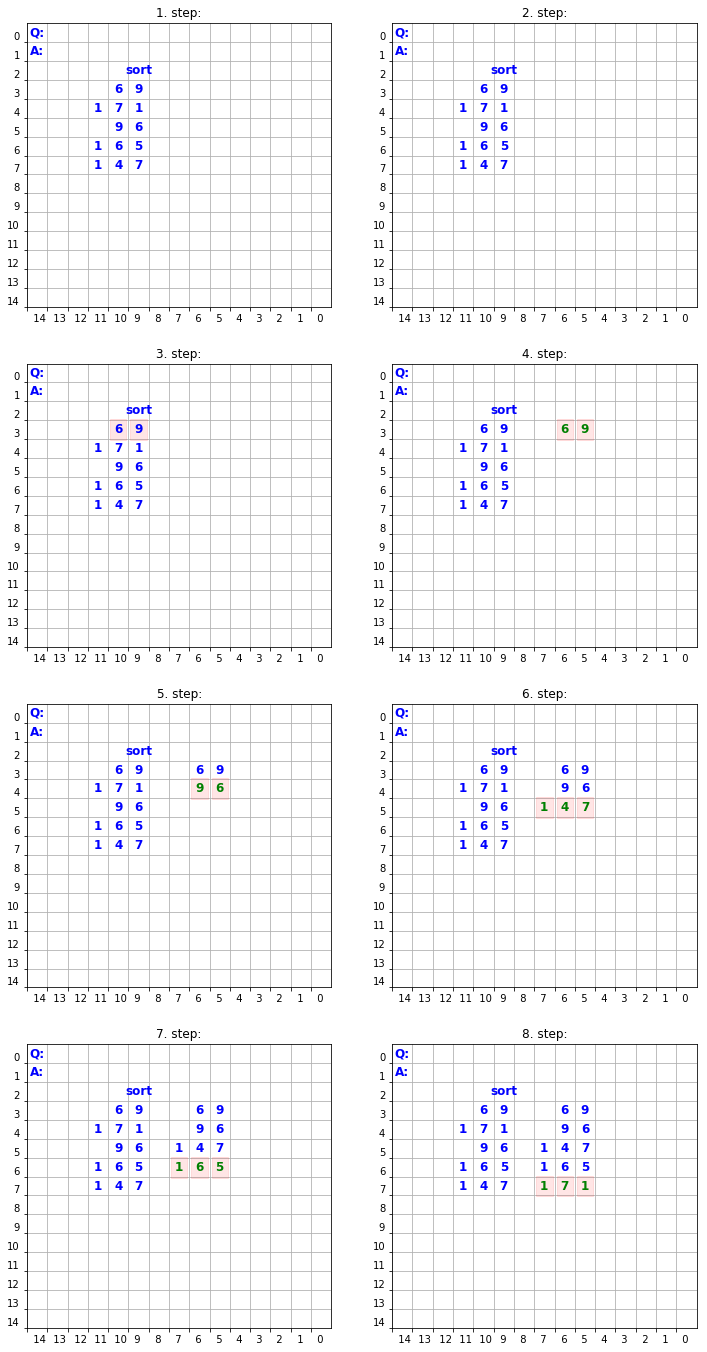

In [21]:
solve_sort()

# Multiplication Solver

In [30]:
def solve_multiplication(a=decimal.Decimal('0.23'), b=decimal.Decimal('0.67')):
    res = next(iter(MultiplySolver(15).generator(add_problem_generator(a,b))))
    plot_steps(res)

/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


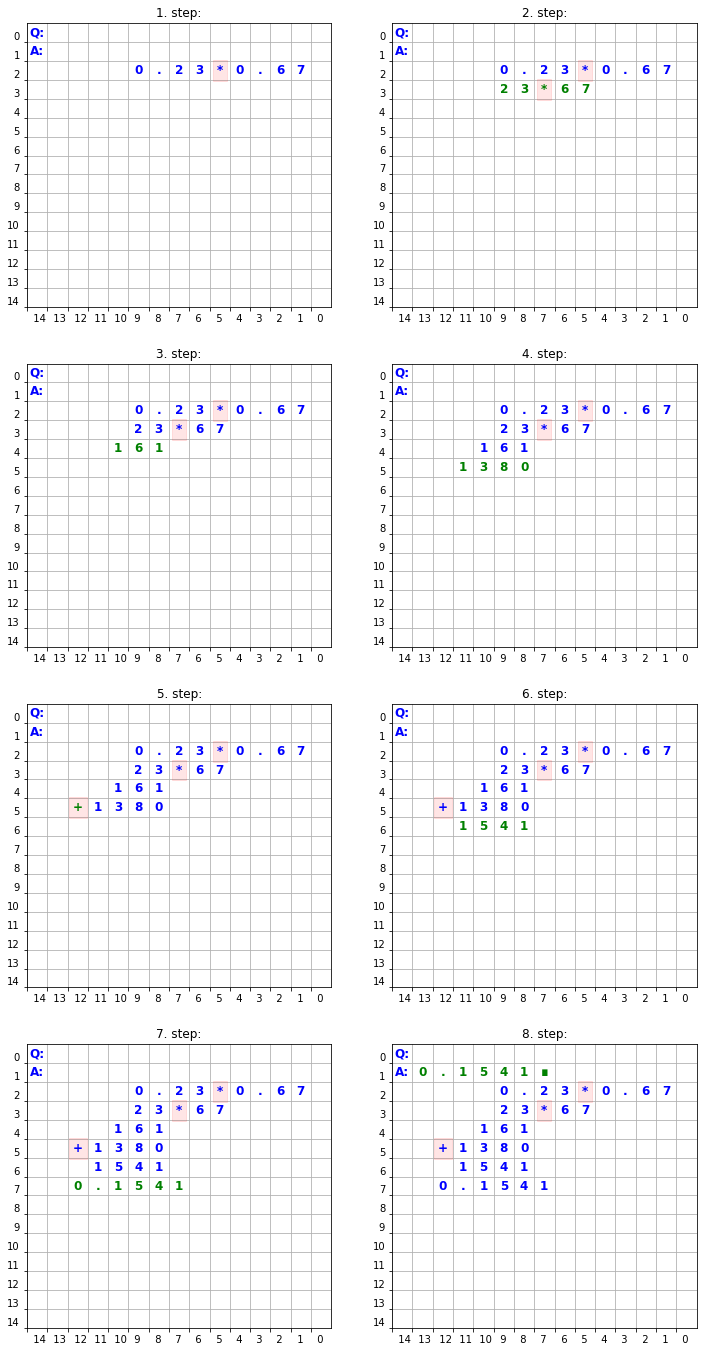

In [31]:
solve_multiplication()

/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


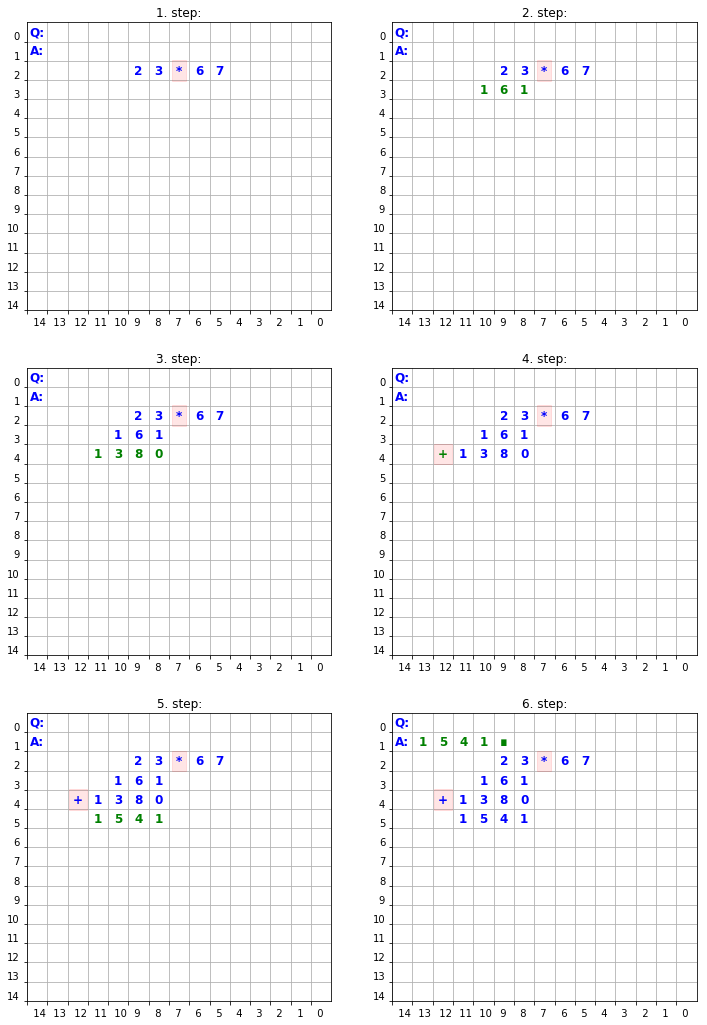

In [33]:
solve_multiplication(a=23, b=67)

/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
/home/bbea/venvs/dl/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


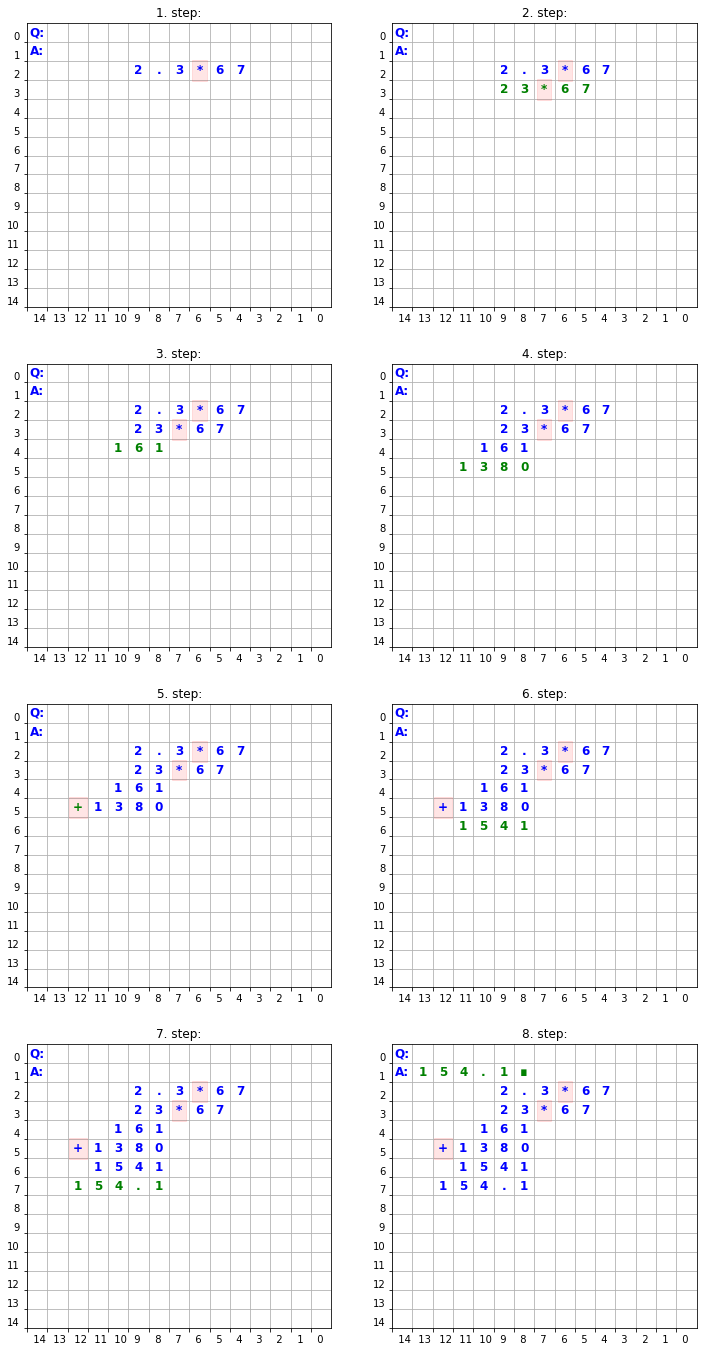

In [36]:
solve_multiplication(a=decimal.Decimal('2.3'), b=67)

# Pair comparison

In [ ]:
def solve_pair_comparison(a=27, b=67):
    res = next(iter(PaircomparisonSolver(15).generator(add_problem_generator(a,b))))
    plot_steps(res)

In [ ]:
solve_pair_comparison()